Questions:
-  altitudes


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
import hvplot.pandas
import geoviews as gv
import api_keys
# import holoviews as hv

In [2]:
import hvplot

## Read and Describe dataset

In [3]:
df= pd.read_csv('Plane Crashes.csv')
df

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 non-null  float6

In [5]:
df.describe()

,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


In [6]:
df.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [7]:
df.Date.min()

'1918-05-02'

In [8]:
df.Date.max()

'2022-06-03'

In [9]:
# Convert 'date' to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the decade
df['Decade'] = (df['Date'].dt.year // 10) * 10


In [10]:
df.sample(3).T

,13441,25805,3910
Date,1964-07-22 00:00:00,2005-09-21 00:00:00,1940-10-16 00:00:00
Time,NaN,19H 30M 0S,15H 15M 0S
Aircraft,Lockheed P-2 Neptune,Piper PA-61 Aerostar (Ted Smith 601),Avro 652 Anson
Operator,United States Navy - USN,Sky Lifts,Royal Air Force - RAF
Registration,145922,N909KF,L7924
Flight phase,NaN,Takeoff (climb),Flight
Flight type,Military,Private,Training
Survivors,NaN,Yes,No
Crash site,Airport (less than 10 km from airport),Airport (less than 10 km from airport),Mountains
Schedule,NaN,Mexia – La Porte,Cottesmore - Carlisle


In [11]:
df= df[['Date', 'Time' ,'Aircraft','Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Crash location', 'Country', 'Region', 'Crew on board', 'Pax on board',
       'Total fatalities', 'Crash cause', 'Decade']]
df

,Date,Time,Aircraft,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Crash location,Country,Region,Crew on board,Pax on board,Total fatalities,Crash cause,Decade
0,1918-05-02,NaN,De Havilland DH.4,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,0.0,2,Technical failure,1910
1,1918-06-08,NaN,Handley Page V/1500,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,Cricklewood London Metropolis,United Kingdom,Europe,6.0,0.0,5,Technical failure,1910
2,1918-06-11,NaN,Avro 504,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,0.0,1,Unknown,1910
3,1918-06-19,NaN,De Havilland DH.4,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,0.0,1,Technical failure,1910
4,1918-06-24,NaN,Breguet 14,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,NaN,0,Unknown,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,Unknown,2020
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,Durango Durango,Mexico,Central America,1.0,1.0,2,Unknown,2020
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,Dry Bay Alaska,United States of America,North America,1.0,3.0,0,Unknown,2020
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,Shikha Dhawalagiri,Nepal,Asia,3.0,19.0,22,Human factor,2020


## Plotting

In [12]:
decades=df.groupby('Decade')['Date'].count()

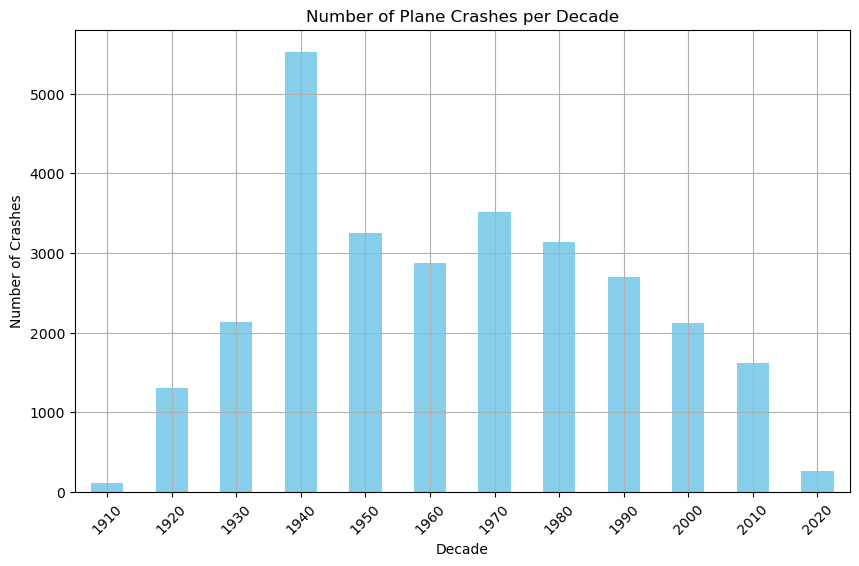

In [13]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
decades.plot(kind='bar', color='skyblue')
plt.title('Number of Plane Crashes per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

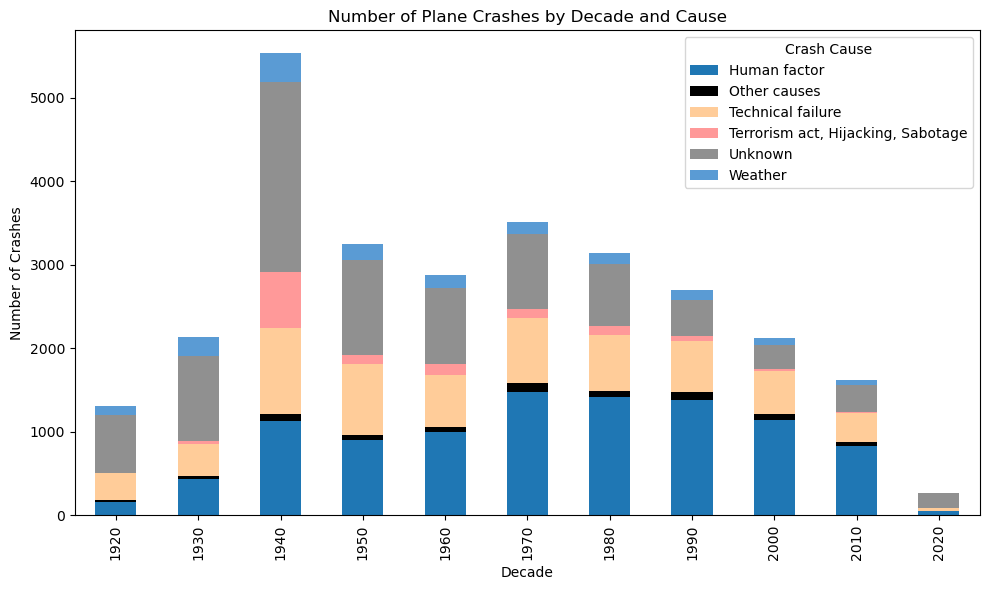

In [102]:
causes = df.loc[df.Decade != 1910].groupby(['Decade', 'Crash cause'])['Crash cause'].count()
causes_unstacked = causes.unstack()

colors = ['#1f77b4',  # Dark Blue
          '#000000',  # Black
          '#ffcc99',  # Light Orange
          '#ff9999',  # Light Red
          '#909090',  # Medium Gray
          '#5a9bd4',  # Medium Blue
          ]  
causes_unstacked.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Add labels and title
plt.title('Number of Plane Crashes by Decade and Cause')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Cause')
plt.tight_layout()

# Show the plot
plt.savefig('plane_crashes_by_decade.png', format='png', dpi=300)
plt.show()

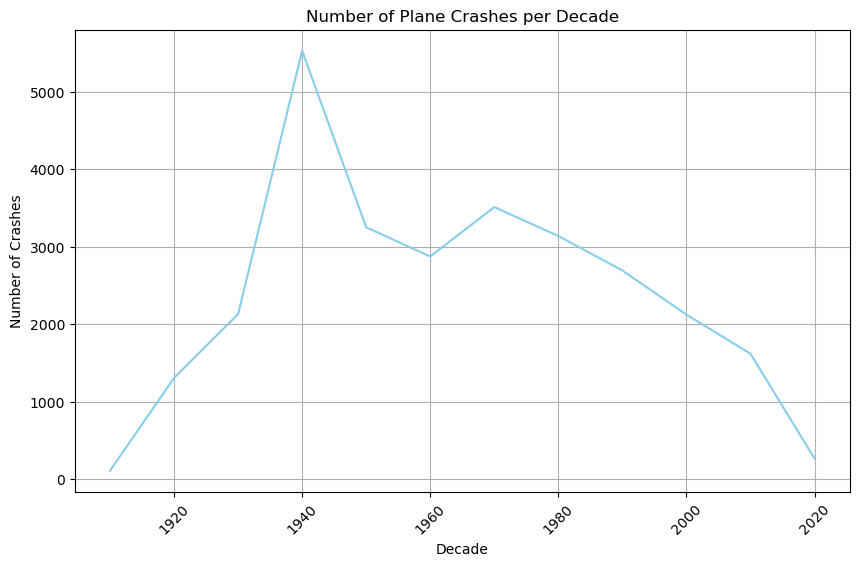

In [14]:
plt.figure(figsize=(10, 6))
decades.plot(kind='line', color='skyblue')
plt.title('Number of Plane Crashes per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
fatalities=df.groupby('Decade')['Total fatalities'].sum()

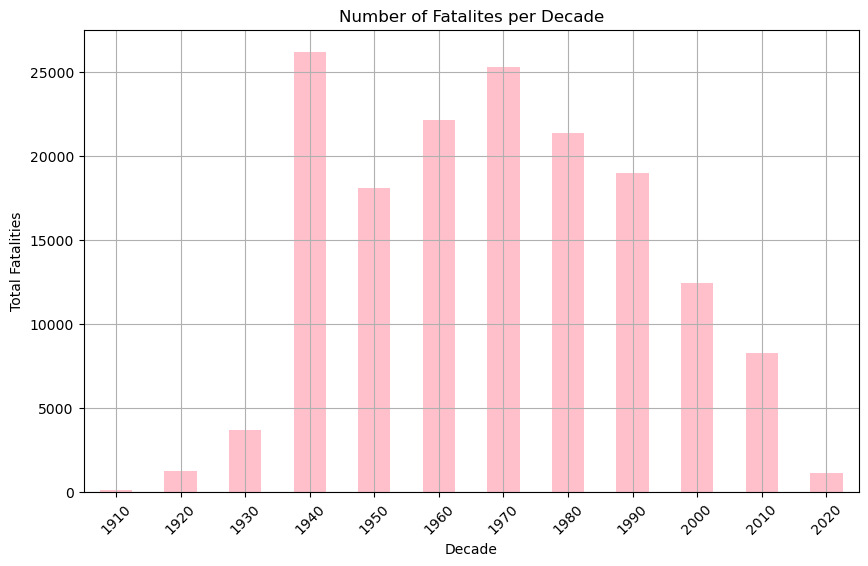

In [16]:
plt.figure(figsize=(10, 6))
fatalities.plot(kind='bar', color='pink')
plt.title('Number of Fatalites per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

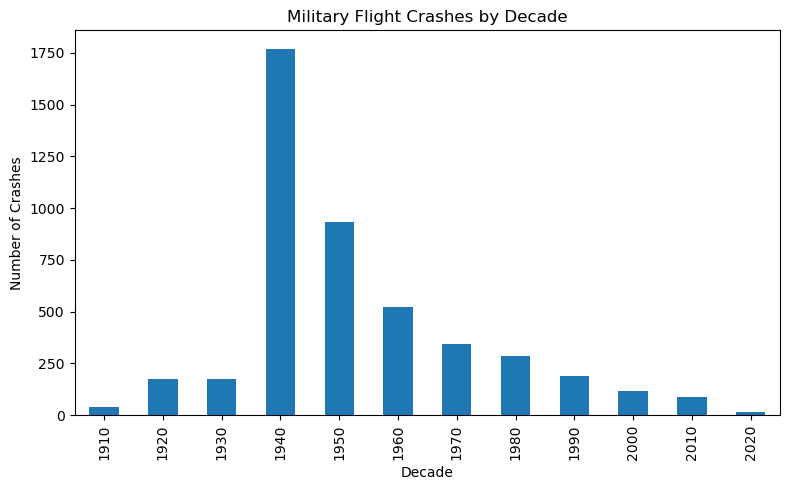

In [103]:
military = df.loc[df['Flight type'] == 'Military'].groupby('Decade')['Flight type'].count()
military.plot(kind='bar', figsize=(8, 5))

# Add labels and title
plt.title('Military Flight Crashes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
# plt.legend(title='Crash Cause')
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
sites=df['Crash site'].value_counts()

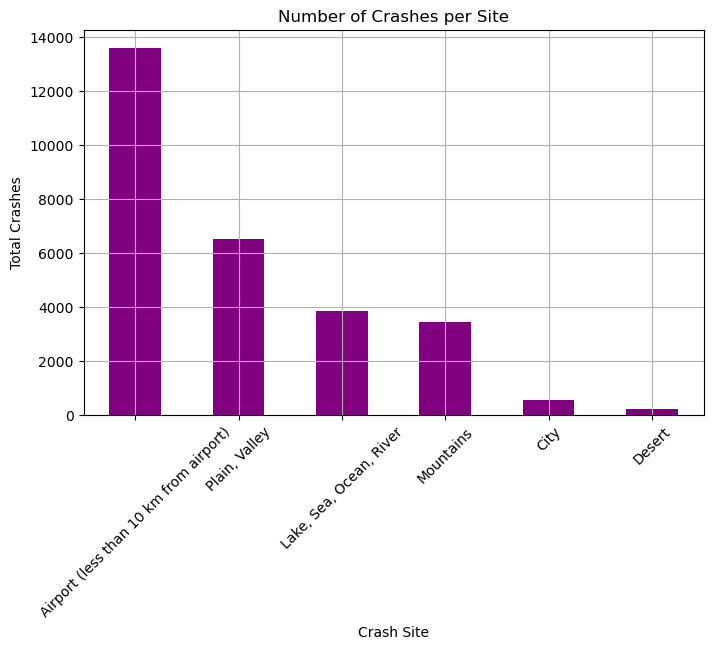

In [109]:
plt.figure(figsize=(8, 5))
sites.plot(kind='bar', color='purple')
plt.title('Number of Crashes per Site')
plt.xlabel('Crash Site')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('crashes_per_site.png', format='png', dpi=300)
plt.show()

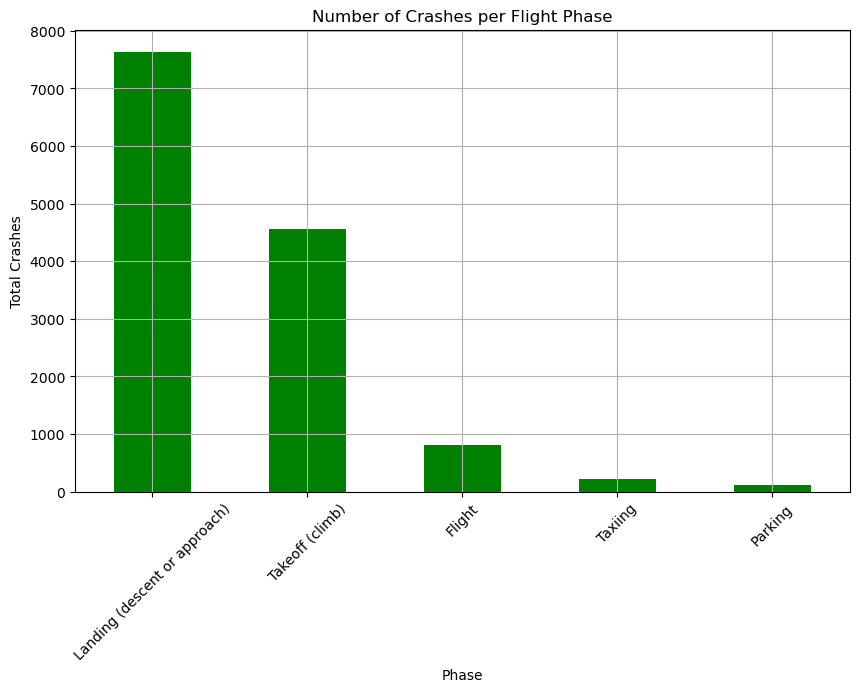

In [110]:
phases = df.loc[df['Crash site'] == 'Airport (less than 10 km from airport)']['Flight phase'].value_counts()
plt.figure(figsize=(10, 6))
phases.plot(kind='bar', color='green')
plt.title('Number of Crashes per Flight Phase')
plt.xlabel('Phase')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('plane_crashes_per_phase.png', format='png', dpi=300)
plt.show()

## Stats tests

In [94]:
from scipy.stats import ttest_ind, chi2_contingency

# Compare military vs. civilian crashes
military_crashes = df[df['Flight type'] == 'Military']['Total fatalities']
civilian_crashes = df[df['Flight type'] != 'Military']['Total fatalities']

t_stat, p_val = ttest_ind(military_crashes.dropna(), civilian_crashes.dropna())
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")


T-test results: t-statistic = 2.473053994394369, p-value = 0.01340217042603988


In [89]:
# crash causes across different decades

crash_cause_decade = pd.crosstab(df['Crash cause'], df['Decade'])
chi2_stat, p_val, dof, expected = chi2_contingency(crash_cause_decade)
print(f"Chi-square test results: chi2-statistic = {chi2_stat}, p-value = {p_val}")


Chi-square test results: chi2-statistic = 4058.214470676822, p-value = 0.0


In [96]:
from scipy.stats import f_oneway

# Drop rows with missing values for 'Total fatalities' and 'Crash cause'
df_anova = df[['Crash cause', 'Total fatalities']].dropna()

# Group the data by 'Crash cause' and create a list of arrays, where each array contains the fatalities for a specific cause
groups = [group['Total fatalities'].values for name, group in df_anova.groupby('Crash cause')]

# Perform the ANOVA test
f_stat, p_val = f_oneway(*groups)

# Print the results
print(f"ANOVA test results: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in the mean number of fatalities across different crash causes.")
else:
    print("There is no significant difference in the mean number of fatalities across different crash causes.")


ANOVA test results: F-statistic = 85.0585, p-value = 0.0000
There is a significant difference in the mean number of fatalities across different crash causes.


## Linear Regression

Linear Regression Results:
Slope: 0.0419
Intercept: -77.4739
R-squared: 0.3764
P-value: 0.0339


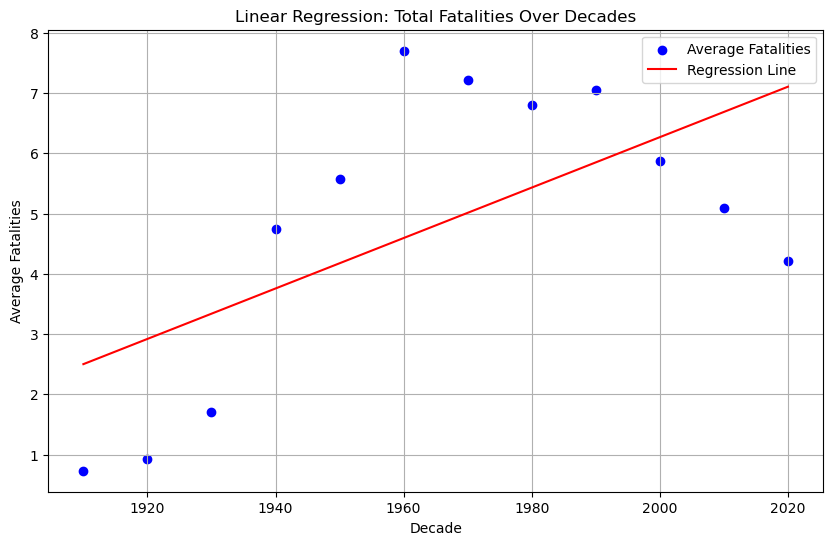

In [97]:
from scipy.stats import linregress

# Prepare the data: Group by Decade and calculate the average number of fatalities per decade
decade_avg_fatalities = df.groupby('Decade')['Total fatalities'].mean().dropna()

# Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(decade_avg_fatalities.index, decade_avg_fatalities.values)

# Print the results
print(f"Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(decade_avg_fatalities.index, decade_avg_fatalities.values, color='blue', label='Average Fatalities')
plt.plot(decade_avg_fatalities.index, intercept + slope*decade_avg_fatalities.index, 'r', label='Regression Line')
plt.title('Linear Regression: Total Fatalities Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Fatalities')
plt.legend()
plt.grid(True)
plt.show()


## Geo plotting crash sites

In [19]:
countries = df['Country'].unique().tolist() # unique countries in a list
countries

['United States of America',
 'United Kingdom',
 'Egypt',
 'France',
 'Portugal',
 'Greece',
 'Slovakia',
 'Italy',
 'Belgium',
 'Ireland',
 'Czech Republic',
 'Mexico',
 'Germany',
 'Sudan',
 'South Africa',
 'Malaysia',
 'Tanzania',
 'Zimbabwe',
 'Switzerland',
 'Spain',
 'World',
 'Colombia',
 'Sweden',
 'Indonesia',
 'Cuba',
 'Norway',
 'Philippines',
 'Canada',
 'New Zealand',
 'Brazil',
 'Poland',
 'Iraq',
 'Australia',
 'Netherlands',
 'Denmark',
 'Pakistan',
 'Chile',
 'China',
 'Turkey',
 'India',
 'Morocco',
 'Hungary',
 'Russia',
 'Lithuania',
 'Romania',
 'Niger',
 'Georgia',
 'Mauritania',
 'Estonia',
 'Algeria',
 'Uruguay',
 'Bolivia',
 'Western Sahara',
 'Kenya',
 'Venezuela',
 'Ukraine',
 'Dominican Republic',
 'Guyana',
 'Austria',
 'Senegal',
 'Finland',
 'Papua New Guinea',
 'Argentina',
 'Bulgaria',
 'Japan',
 'Panama',
 'Bahamas',
 'Tunisia',
 'Zambia',
 'Puerto Rico',
 'Costa Rica',
 'Myanmar',
 'Democratic Republic of Congo',
 'South Sudan',
 'Paraguay',
 'Nicara

In [20]:

# Your OpenWeather API Key
api_key = api_keys.weather_api_key

results = []

# Function to get latitude and longitude using OpenWeather API
def get_lat_lon(country, api_key):
    url = f'http://api.openweathermap.org/geo/1.0/direct?q={country}&limit=1&appid={api_key}'
    response = requests.get(url).json()
    if response:
        return response[0]['lat'], response[0]['lon']
    else:
        return None, None

# Loop through the countries list
for idx, country in enumerate(countries):
    print(f"Processing {idx + 1}/{len(countries)}: {country}")
    lat, lon = get_lat_lon(country, api_key)
    if lat is not None and lon is not None:
        results.append({'Country': country, 'Latitude': lat, 'Longitude': lon})

# Convert the results to a DataFrame
df_countries = pd.DataFrame(results)

df_countries

Processing 1/220: United States of America
Processing 2/220: United Kingdom
Processing 3/220: Egypt
Processing 4/220: France
Processing 5/220: Portugal
Processing 6/220: Greece
Processing 7/220: Slovakia
Processing 8/220: Italy
Processing 9/220: Belgium
Processing 10/220: Ireland
Processing 11/220: Czech Republic
Processing 12/220: Mexico
Processing 13/220: Germany
Processing 14/220: Sudan
Processing 15/220: South Africa
Processing 16/220: Malaysia
Processing 17/220: Tanzania
Processing 18/220: Zimbabwe
Processing 19/220: Switzerland
Processing 20/220: Spain
Processing 21/220: World
Processing 22/220: Colombia
Processing 23/220: Sweden
Processing 24/220: Indonesia
Processing 25/220: Cuba
Processing 26/220: Norway
Processing 27/220: Philippines
Processing 28/220: Canada
Processing 29/220: New Zealand
Processing 30/220: Brazil
Processing 31/220: Poland
Processing 32/220: Iraq
Processing 33/220: Australia
Processing 34/220: Netherlands
Processing 35/220: Denmark
Processing 36/220: Pakista

,Country,Latitude,Longitude
0,United Kingdom,25.223317,55.159415
1,Egypt,-27.676714,152.098411
2,France,46.233730,5.353878
3,Portugal,-1.629263,-45.236815
4,Greece,43.209784,-77.693060
...,...,...,...
177,Dominica,15.424043,-61.341853
178,Albania,5.758765,-73.915162
179,Kosovo,42.620204,21.156183
180,Anguilla,32.974016,-90.824544


In [21]:
# Plotting the data on a map using hvplot
map_plot = df_countries.hvplot.points('Longitude', 'Latitude', geo=True, tiles='OSM', size=10, color='red',
                            hover_cols=['Country'], title='Plane Crash Locations')

# Show the plot
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country)

In [105]:
df_countries

,Country,Latitude,Longitude
0,United Kingdom,25.223317,55.159415
1,Egypt,-27.676714,152.098411
2,France,46.233730,5.353878
3,Portugal,-1.629263,-45.236815
4,Greece,43.209784,-77.693060
...,...,...,...
177,Dominica,15.424043,-61.341853
178,Albania,5.758765,-73.915162
179,Kosovo,42.620204,21.156183
180,Anguilla,32.974016,-90.824544
